In [1]:
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt
import chardet

In [2]:
with open('datasets/data.csv', 'rb') as f:
    result = chardet.detect(f.read())


data = pd.read_csv('datasets/data.csv', encoding=result['encoding'])

In [3]:
data.head()

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0


## Какой рекламный канал принёс больше всего дохода?

In [4]:
table = pd.pivot_table(data,
                       values='revenue',
                       index='source', 
                       aggfunc=np.sum).sort_values(by='revenue', ascending=False)

In [5]:
table.head()

,revenue
source,
yandex,4.674748e+08
google,4.565170e+08
(direct),2.384474e+08
admitad,6.573886e+07
eLama,1.643239e+07


## Ответ: *Yandex*

## Как изменился средний чек транзакции после введения коронавирусных ограничений?

In [6]:
average = data.groupby([ 'date'])['revenue'].agg([ 'count', 'sum'])
average.head()

,count,sum
date,,
2020-01-01,171,3528167.0
2020-01-02,183,4867543.0
2020-01-03,182,4978608.0
2020-01-04,192,5338299.0
2020-01-05,191,5300997.0


In [7]:
average['av'] = average['sum']/average['count']
average.head()

,count,sum,av
date,,,
2020-01-01,171,3528167.0,20632.555556
2020-01-02,183,4867543.0,26598.595628
2020-01-03,182,4978608.0,27354.989011
2020-01-04,192,5338299.0,27803.640625
2020-01-05,191,5300997.0,27753.910995


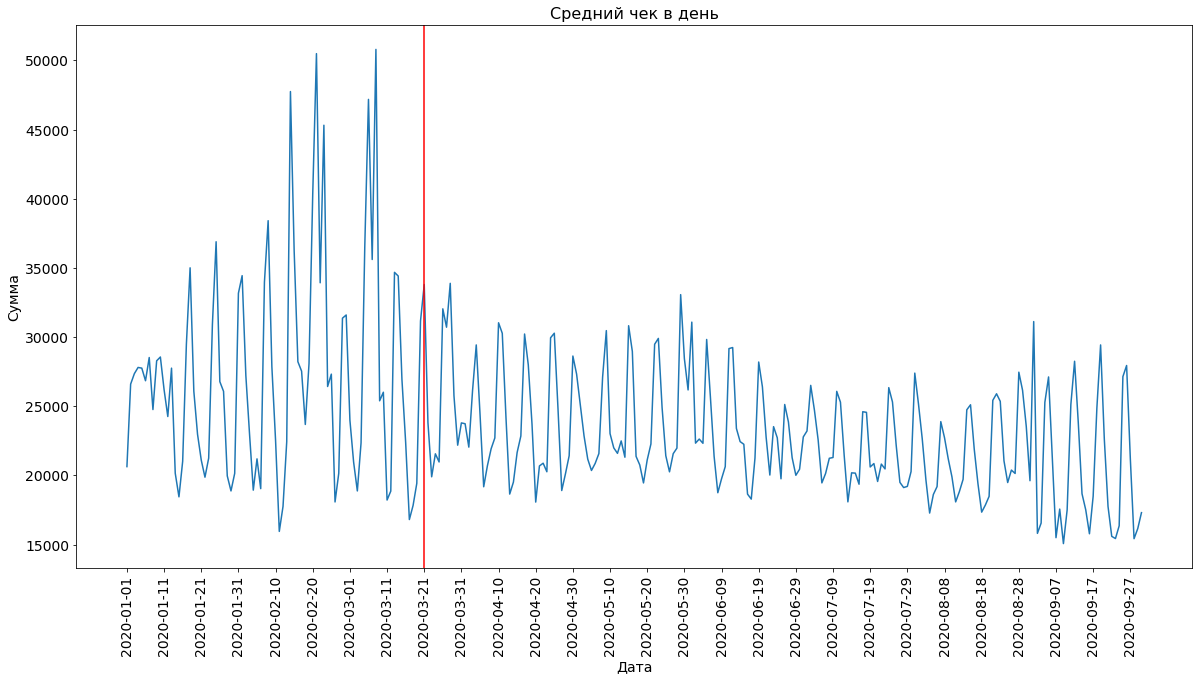

In [8]:
plt.figure(figsize=(20,10))
plt.plot(average['av'])
plt.axvline('2020-03-21', c='red')
plt.xticks(average.index[::10], rotation = 'vertical', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Сумма', fontsize=14)
plt.title('Средний чек в день', fontsize=16)
plt.show()

Судя по графику, средний чек снизился после введения карантинных ограничений (21 марта 2020, отмечено красной линией)

In [9]:
def covid(df):
    before_covid = df[:'2020-03-20']
    print('Средний чек до введения ограничений', before_covid['sum'].sum() / before_covid['count'].sum())
    after_covid = df['2020-03-21':]
    print('Средний чек после введения ограничений', after_covid['sum'].sum() / after_covid['count'].sum())
    print()
    print('Соотношение ПОСЛЕ / ДО ковидных ограничений', 
          (after_covid['sum'].sum() / after_covid['count'].sum())/\
          (before_covid['sum'].sum() / before_covid['count'].sum()))

In [10]:
covid(average)

Средний чек до введения ограничений 27827.939330543933
Средний чек после введения ограничений 22842.448396467276

Соотношение ПОСЛЕ / ДО ковидных ограничений 0.8208458457933827


Замечено снижение на 18%

### Выделим подгруппы по использованию промокода:

In [11]:
average_promo = data.groupby([ 'date', 'promo_activated'])['revenue'].agg([ 'count', 'sum'])
average_promo .head()

count        sum
date       promo_activated                  
2020-01-01 no                  96  2043566.0
           yes                 75  1484601.0
2020-01-02 no                 101  2767274.0
           yes                 82  2100269.0
2020-01-03 no                  97  2725093.0

In [12]:
average_promo['av'] = average_promo['sum']/average_promo['count']
average_promo = average_promo.reset_index(level=['promo_activated'])
average_promo.head()

,promo_activated,count,sum,av
date,,,,
2020-01-01,no,96,2043566.0,21287.145833
2020-01-01,yes,75,1484601.0,19794.680000
2020-01-02,no,101,2767274.0,27398.752475
2020-01-02,yes,82,2100269.0,25613.036585
2020-01-03,no,97,2725093.0,28093.742268


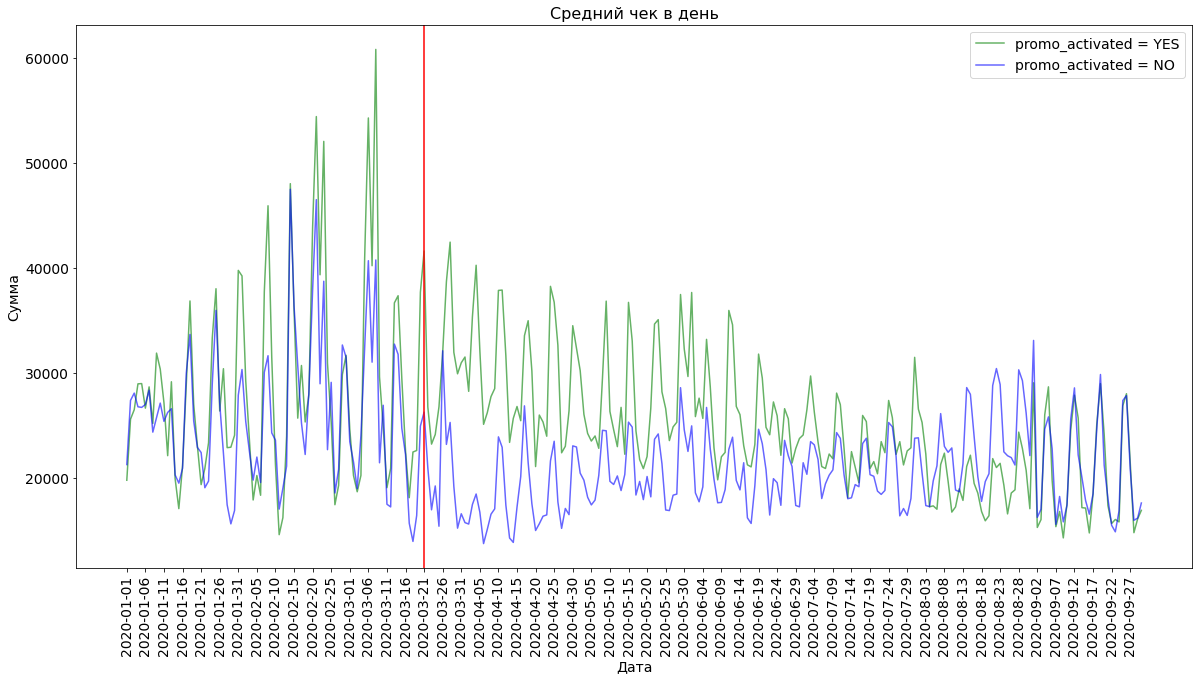

In [13]:
plt.figure(figsize=(20,10))
plt.plot(average_promo[average_promo['promo_activated']=='yes']['av'], color='green', alpha=0.6,
         label='promo_activated = YES')
plt.plot(average_promo[average_promo['promo_activated']=='no']['av'], color='blue', alpha=0.6,
         label='promo_activated = NO')
plt.axvline('2020-03-21', c='red')
plt.xticks(average_promo.index[::10], rotation = 'vertical', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Сумма', fontsize=14)
plt.title('Средний чек в день', fontsize=16)
plt.legend(loc='upper right',  fontsize=14)
plt.show()

Визуально суммы транзакций без промокода более резко упали после введения карантина, чем с промокодами.

Однако, к сентябрю транзакции без промокода растут лучше, чем с ним.

In [14]:
covid(average_promo[average_promo['promo_activated']=='yes'])

Средний чек до введения ограничений 29762.457818459192
Средний чек после введения ограничений 25133.841121495327

Соотношение ПОСЛЕ / ДО ковидных ограничений 0.8444813689381152


In [15]:
covid(average_promo[average_promo['promo_activated']=='no'])

Средний чек до введения ограничений 26199.067308927424
Средний чек после введения ограничений 20684.138685115857

Соотношение ПОСЛЕ / ДО ковидных ограничений 0.7894990474743986


## Вывод
**Итого, наибольший средний чек ДО и ПОСЛЕ – С промокодом, замечено снижение в 15,5% после введения ковидных ограничений**

**БЕЗ промокода – снижение среднего чека в 21% после введения ковидных ограничений**

В целом, снижение среднего чека меньше было тоже с использованием промокода, несмотря на рост транзакций без промокода в августе-сентябре

## Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?

Добавим признак `is_weekend`, который отображает, текущая дата выходной или нет. Праздничные дни за 2018 год тоже выходные. 

Данные скачаны с https://data.gov.ru/opendata/7708660670-proizvcalendar, но для удобства откроем их с гитхаба.

In [16]:
url = 'https://raw.githubusercontent.com/svetamw/Time_Series/main/data.csv'
df_calendar = pd.read_csv(url,index_col=0)
df_calendar.head()

,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Всего рабочих дней,Всего праздничных и выходных дней,Количество рабочих часов при 40-часовой рабочей неделе,Количество рабочих часов при 36-часовой рабочей неделе,Количество рабочих часов при 24-часовой рабочей неделе
Год/Месяц,,,,,,,,,,,,,,,,,
1999,"1,2,3,4,6*,7,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*",251,114,2004,1807.2,1204.8
2000,"1,2,3,4,6*,7,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,2,6,7,8*,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,7,11,12,18,19,25,26","2,3,9,10,11*,12,16,17,23,24,30,31",250,116,1995,1800.0,1200.0
2001,"1,2,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29,30*","1,2,5,6,8*,9,12,13,19,20,26,27","2,3,9,10,11*,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,6*,7,10,11,17,18,24,25","1,2,8,9,12,15,16,22,23,29,30",251,114,2001,1807.2,1204.8
2002,"1,2,5,6,7,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","2,3,7*,8,9,10,16,17,23,24,30,31","6,7,13,14,20,21,28,30*","1,2,3,4,5,8*,9,10,11,12,19,25,26","1,2,8,9,11*,12,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,6*,7,8,9,16,17,23,24,30","1,7,8,11*,12,13,14,21,22,28,29,31*",250,115,1992,1792.0,1192.0
2003,"1,2,3,5*,6,7,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,4,8*,9,10,11,17,18,24,25,31","1,7,8,11*,12,13,14,15,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,6*,7,8,9,15,16,22,23,29,30","6,7,11*,12,13,14,20,21,27,28,31*",250,115,1992,1792.0,1192.0


In [17]:
df1 = df_calendar[21:22]
cols = [ 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь']

In [18]:
df1

,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Всего рабочих дней,Всего праздничных и выходных дней,Количество рабочих часов при 40-часовой рабочей неделе,Количество рабочих часов при 36-часовой рабочей неделе,Количество рабочих часов при 24-часовой рабочей неделе
Год/Месяц,,,,,,,,,,,,,,,,,
2020,"1,2,3,4,5,6,7,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24+,29","1,7,8,9+,14,15,21,22,28,29","4,5,11,12,18,19,25,26,30*","1,2,3,4+,5+,8*,9,10,11+,16,17,23,24,30,31","6,7,11*,12,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","3,4,10,11,17,18,24,25,31","1,3*,4,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27,31*",248,118,1979,1780.6,1185.4


In [20]:
from datetime import date
l = []
for col in cols:
    m = df1[col].tolist()[0].replace(',', ' ').replace('*', '').replace('+', '').split()
    for day in m:
        l.append(date(2020,  cols.index(col) + 1 , int(day)))

In [21]:
data['is_weekend'] = 0
for i in range(len(data)):
    if date(pd.to_datetime(data['date'][i]).year, 
            pd.to_datetime(data['date'][i]).month, 
            pd.to_datetime(data['date'][i]).day) in l:
        data['is_weekend'][i] = 1
    else:
        data['is_weekend'][i] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
data.head()

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,is_weekend
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0,1
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0,1
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0,1
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0,1
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0,1


Считаем конверсию

In [23]:
data['cr'] = (data['transactions']/ data['addToCart'])*100

Для проверки гипотезы будем использовать t-тест, т.к. сравниваемые выборки независимы между собой.

In [24]:
def hypothesis(alpha, arr1, arr2, eq_var):
    res = st.ttest_ind(arr1, arr2,
                      equal_var = eq_var,  # Welch’s t-test
                      nan_policy = 'omit')

    print('p-значение:', res.pvalue)

    if res.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Нулевая гипотеза $H_0$:

Коэф-ты конверсии транзакции в будни и выходные **не различаются**
___
Альтернативная гипотеза $H_1$:

Коэф-ты конверсии транзакции в будни и выходные  **различаются**

In [25]:
from scipy import stats as st
hypothesis(0.05, data[data['is_weekend'] == 0]['cr'], data[data['is_weekend'] == 1]['cr'], False)

p-значение: 5.198282649895978e-11
Отвергаем нулевую гипотезу


## Вывод: 
Коэф-ты конверсии транзакции в будни и выходные различаются